# Atividade: *Perceptron* - Petróleo

**INSTITUTO FEDERAL DE MINAS GERAIS**

*Departamento de Engenharia e Computação*   

*Professor: Ciniro Nametala Leite*

*Aluno: Luan Carlos dos Santos*

---

### Pacotes necessários

In [52]:
import numpy as np
import pandas as pd
import pygwalker as pyg
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report,  ConfusionMatrixDisplay
import seaborn as sns
import plotly.graph_objects as go


---

### Funções

   - Degrau Bipolar

In [53]:
def degrau_bipolar(u):
   if u >= 0:
      y = 1 # óleo P1
   else:
      y = -1 # óleo P2
   return y

   - Previsão

In [54]:
def previsao(w, x):
   u = np.dot(w.T, x)
   yhat = degrau_bipolar(u)
   return yhat # esse y hat é a previsão da perceptron

---

### Conjunto de dados
   - Coletando os dados de treinamento;

In [55]:

dados = pd.read_csv('../data-sets/tabela_treino.csv', sep=';')

   - Armazenando a quantidade de amostras, variáveis e matriz de treinamento;

In [56]:
n_amostras = dados.shape[0] 
n_variaveis = dados.shape[1] -1
x = dados.iloc[:, 1:n_variaveis].values
pd.DataFrame(x)[:5]

,0,1,2
0,-0.6508,0.1097,40.009
1,-14.4920,0.8896,44.005
2,2.0850,0.6876,79.845
3,0.2626,11.4760,12.071
4,0.6418,10.2340,77.985


   - Inserindo o *"bias"* na matriz de treinamento;

In [57]:
# Criando um vetor preenchido com '1s' * -1
bias = np.ones((n_amostras, 1)) * -1
x = np.hstack((x, bias))
pd.DataFrame(x)[:5]

,0,1,2,3
0,-0.6508,0.1097,40.009,-1.0
1,-14.4920,0.8896,44.005,-1.0
2,2.0850,0.6876,79.845,-1.0
3,0.2626,11.4760,12.071,-1.0
4,0.6418,10.2340,77.985,-1.0


   - Armazenando o vetor de saida;

In [58]:
y = dados['d'].values
print(y)

print(f"Quantidade de amostras tipo P1(1): {(y == 1).sum()}")
print(f"Quantidade de amostras tipo P2(-1): {(y== -1).sum()}")

[-1. -1. -1. -1.  1.  1. -1.  1. -1.  1. -1. -1. -1. -1. -1. -1.  1.  1.
  1.  1. -1.  1.  1.  1.  1. -1. -1.  1. -1.  1.]
Quantidade de amostras tipo P1(1): 14
Quantidade de amostras tipo P2(-1): 16


   - Inicializando o vetor de pesos $w$ com valores aleatórios de 0 a 1;

In [59]:
w = np.random.uniform(0, 1, n_variaveis)
print(w)

[0.6631661  0.09483257 0.65618315 0.47058536]


## Pré configurações de Treinamento

   - #### Definindo a taxa de aprendizagem $η$, a tolerância e o erro médio inicial;

In [60]:
eta = 0.01
tolerancia = 0.01
erro_medio = tolerancia + 0.1

   - Criando um vetor de épocas, contador e o máximo de épocas;

In [61]:
erros_epocas = []
epoca = 0
max_epocas = 400

   - Inicializando os critérios de parada do treinamento;

In [62]:
criterio_erro = True
criterio_epoca = True

## 1. Treinamento da RNA com Arquitetura *Perceptron*

*"5 Treinamentos com pesos aleatórios entre 0 e 1"*

In [63]:
n_treinamentos = 5
pesos_iniciais = []
pesos_finais = []
erros_treinamentos = []

for treinamento in range(n_treinamentos):
   
   # reinicializando os pesos aleatórios
   w = np.random.uniform(0, 1, n_variaveis)
   pesos_iniciais.append(w.copy())

   # reinicia variáveis de controle
   criterio_erro = True
   criterio_epoca = True
   epoca = 0
   erros_epocas = []
   
   while criterio_erro and criterio_epoca:
      erro_atual = 0
      epoca += 1
      
      # embaralhando os indíces pra usar na rede
      indice_aleatorios = np.random.permutation(n_amostras)
      
      # para cada amostra no conjunto de amostras
      for i in range(n_amostras):
         # pegando indice_aleatorio pra amostra i
         i_amostra = indice_aleatorios[i]
         
         # capturando uma amostra da matriz de treinamento vinculada ao indice coletado do pool de indice_aleatorios
         amostra_atual = x[i_amostra,:]
         
         # calculando o potencial de ativação
         u = np.dot(w.T, amostra_atual)
         
         # obtendo previsão da rede pela Degrau Bipolar
         yhat = degrau_bipolar(u)
         
         # calculando o erro entre a previsão e o esperado
         e = y[i_amostra] - yhat
         
         # atualizando os pesos pela regra de HEBB
         w = w + ((eta * e) * amostra_atual)
         
         # acumulando os erros de de todas as amostras
         erro_atual += np.abs(e)
         
      # calcular o erro médio da época
      erro_medio = erro_atual/n_amostras
      
      # adicionando o erro medio ao vetor de erros do treinamento
      erros_epocas.append(erro_medio)
      # verificando e atualizando os critérios de parada
      criterio_erro = (erro_medio > tolerancia)
      criterio_epoca = (epoca < max_epocas) 
   erros_treinamentos.append(erros_epocas) # pegando os erros_epocas de cada treinamento pra gerar o grafico de convergencia
   pesos_finais.append(w.copy())
   # print(f'Época: {epoca}')




## 2. Registro dos pesos $w$ antes e depois

In [64]:
# criando nomes das colunas
colunas_iniciais = [f'w{i}' for i in range(n_variaveis)]
colunas_finais = [f'w{i}' for i in range(n_variaveis)]
colunas = colunas_iniciais + colunas_finais

# juntando pesos iniciais e finais
dados = np.hstack([pesos_iniciais, pesos_finais])

# cria uma coluna de treinos
treinos = [f'Treino {i}' for i in range(n_treinamentos)]

# Cria DataFrame simples
df_pesos = pd.DataFrame(dados, columns=colunas)
df_pesos.insert(0, 'Treino', treinos)

df_pesos

,Treino,w0,w1,w2,w3,w0,w1,w2,w3
0,Treino 0,0.315466,0.851763,0.735539,0.903758,-1.648670,1.568375,-0.078301,6.583758
1,Treino 1,0.352622,0.365836,0.841937,0.812499,-1.555960,1.654824,-0.474043,6.472499
2,Treino 2,0.160380,0.671946,0.698884,0.777896,-1.002736,0.903694,1.477564,6.637896
3,Treino 3,0.857065,0.907045,0.120690,0.254069,-1.801187,1.536949,-1.223210,6.374069
4,Treino 4,0.280460,0.206444,0.851238,0.064262,-1.364980,1.450682,0.544358,6.064262


## 3. Implementação do *Perceptron*

In [65]:
# lê os dados de teste
dados_classificacao = pd.read_csv('../data-sets/tabela_classificacao.csv', sep=';', usecols=['x1', 'x2', 'x3'])
n_amostras_teste = dados_classificacao.shape[0]
bias = np.ones((n_amostras_teste, 1)) * -1
x_teste = np.hstack((dados_classificacao, bias))

previsoes_treinamento = []
for i in range(n_treinamentos):
   # vetor que recebe as previsões da rna para o treino i
   yhat_teste = np.zeros(n_amostras_teste)
   # fazendo as previsoes pra cada modelo de treino
   for j in range(n_amostras_teste):
      yhat_teste[j] = previsao(pesos_finais[i], x_teste[j, :])
   previsoes_treinamento.append(yhat_teste) # guardando as

# converte a lista de previsões em array 2D (treinos x_teste amostras)
previsoes_array = np.array(previsoes_treinamento)

# transpõe pra (amostras x treinos)
previsoes_transpostas = previsoes_array.T

# junta tudo: amostras + dados_classificacao + previsões
resultado = np.hstack((dados_classificacao, previsoes_transpostas))

# nomes das colunas
colunas_x = ['X1', 'X2', 'X3']
colunas_prev = [f'ŷ(T{i+1})' for i in range(previsoes_transpostas.shape[1])]
colunas = colunas_x + colunas_prev

# cria o DataFrame final
df_final = pd.DataFrame(resultado, columns=colunas)

df_final


,X1,X2,X3,ŷ(T1),ŷ(T2),ŷ(T3),ŷ(T4),ŷ(T5)
0,-0.3665,0.0620,5.9891,-1.0,-1.0,1.0,-1.0,-1.0
1,-0.7842,1.1267,5.5912,-1.0,-1.0,1.0,-1.0,-1.0
2,0.3012,0.5611,5.8234,-1.0,-1.0,1.0,-1.0,-1.0
3,0.7757,1.0648,8.0677,-1.0,-1.0,1.0,-1.0,-1.0
4,0.1570,0.8028,6.3040,-1.0,-1.0,1.0,-1.0,-1.0
5,-0.7014,1.0316,3.6005,-1.0,-1.0,1.0,-1.0,-1.0
6,0.3748,0.1536,6.1537,-1.0,-1.0,1.0,-1.0,-1.0
7,-0.6920,0.9404,4.4058,-1.0,-1.0,1.0,-1.0,-1.0
8,-1.3970,0.7141,4.9263,-1.0,-1.0,1.0,-1.0,-1.0
9,-1.8842,0.2805,1.2548,-1.0,-1.0,-1.0,-1.0,-1.0


## 4. Taxa de acerto percentual de cada modelo

   - Matriz de confusão

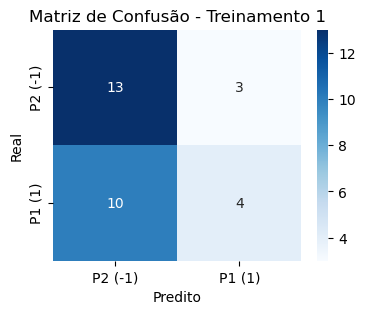

Acurácia: 56.67%


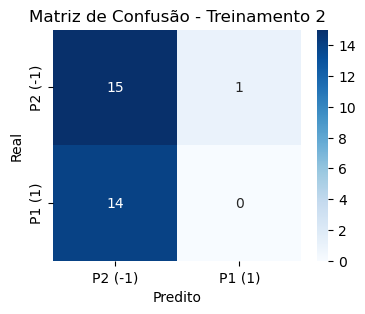

Acurácia: 50.00%


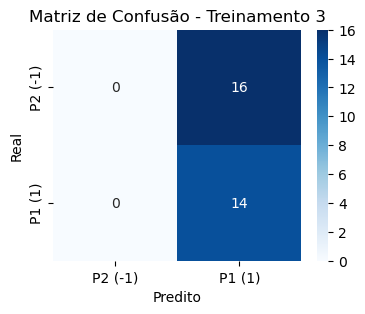

Acurácia: 46.67%


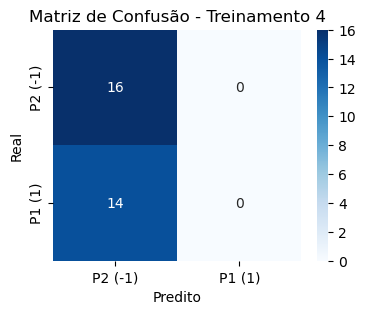

Acurácia: 53.33%


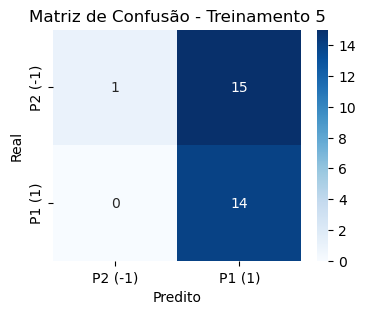

Acurácia: 50.00%


In [66]:
# converte -1 -> 0 apenas para visualização
y_display = np.where(y == -1, 0, y)

for i in range(n_treinamentos):
    # previsões no conjunto de treinamento
    yhat_treino = np.array([degrau_bipolar(np.dot(pesos_finais[i].T, x[j,:])) 
                             for j in range(x.shape[0])])
    
    # converter -1 → 0 para exibir na matriz
    yhat_display = np.where(yhat_treino == -1, 0, yhat_treino)

    # gerar matriz de confusão
    cm = confusion_matrix(y_display, yhat_display)

    # calcular acurácia
    acuracia = np.sum(yhat_treino == y) / len(y) * 100

    # plotar matriz de confusão
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['P2 (-1)', 'P1 (1)'],
                yticklabels=['P2 (-1)', 'P1 (1)'])
    plt.title(f'Matriz de Confusão - Treinamento {i+1}')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()
    print(f"Acurácia: {acuracia:.2f}%")

   - Análise do Gráfico de Convergência do Algorítmo com base no erro de cada época:

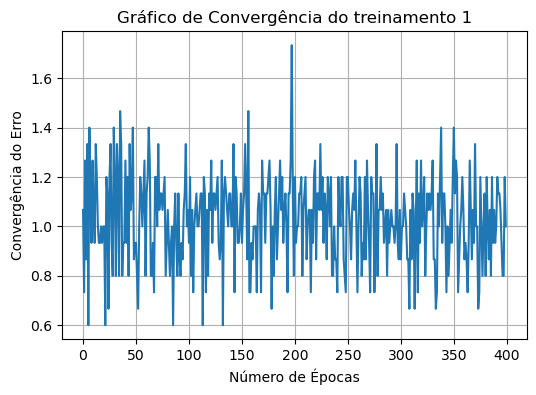

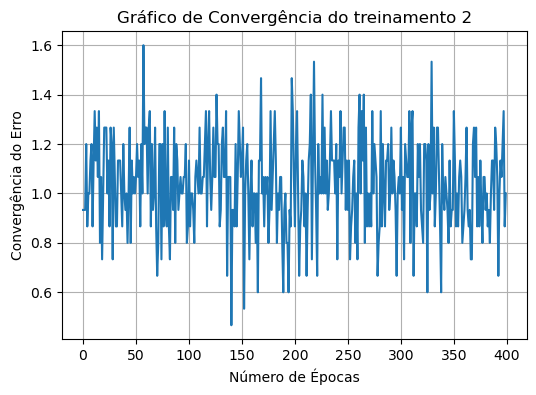

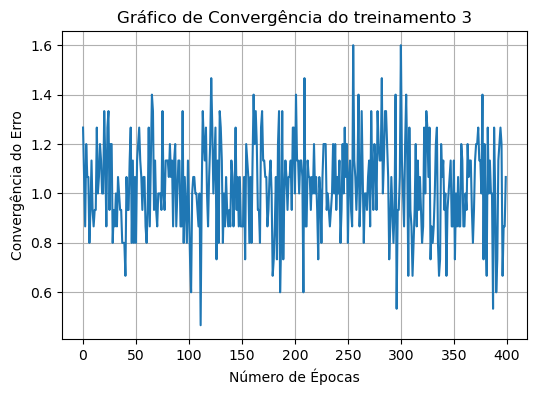

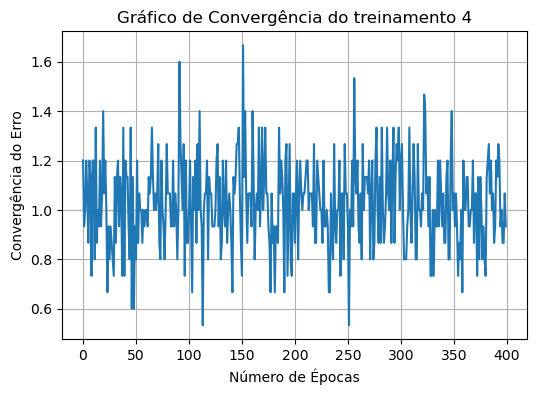

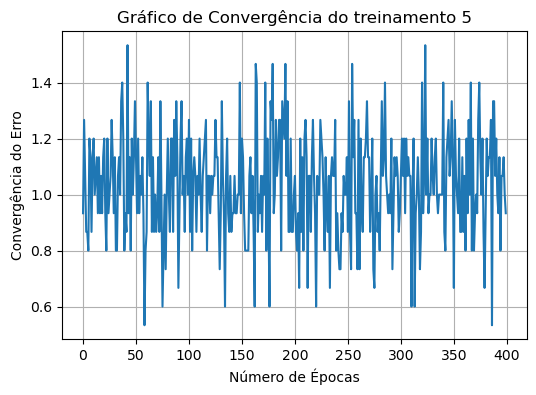

In [67]:
previsoes_treinamento = []

# --- Geração das previsões ---
for i in range(n_treinamentos):
    yhat_teste = np.zeros(n_amostras)
    for j in range(n_amostras):
        yhat_teste[j] = previsao(pesos_finais[i], x[j, :])
    previsoes_treinamento.append(yhat_teste)

acuracia = []

# --- Plot e cálculo da acurácia ---
for i in range(n_treinamentos):
    plt.figure(figsize=(6,4))
    plt.plot(erros_treinamentos[i][:max_epocas])
    plt.title(f'Gráfico de Convergência do treinamento {i+1}')
    plt.xlabel('Número de Épocas')
    plt.ylabel('Convergência do Erro')
    plt.grid(True)
    plt.show()


## 5. Qual o efeito de aumentar ou diminuir o número de épocas na qualidade dos resultados?

Nenhum pois os dados não podem ser classificados;

## 6. Qual o efeito de aumentar ou diminuir a taxa de aprendizagem na qualidade dos resultados?

Independente do valor da taxa de aprendizagem, a qualidade dos resultado fica inferior a 60%;

## 7. Discorra se é possível afirmar se as suas classes, neste problema, são linearmente separáveis.

Não é possível afirmar pois em todos os testes a taxa de acertos foi imprecisa e em nenhum dos casos convergiu!
